In [1]:
import pandas as pd
import numpy as np
import pickle

### 감정분석

- 오피니언 마이닝 
- 텍스트에 담겨져 있는 의견 혹은 태도 추정 기법
- 텍스트 데이터 분석 이전에 감정이 무엇인지 결정 

In [1]:
dic1 = open('./dict/positive-words.txt')
dic2 = open('./dict/negative-words.txt')

positive_words=[]
negative_words=[]

for line in dic1:
    positive_words.append(line.strip('\n'))
for line in dic2:
    negative_words.append(line.strip('\n'))

In [2]:
positive_words[0:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [3]:
negative_words[0:10]

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination']

In [13]:
df = pd.read_pickle('books_all.pkl')
print(df.shape)
df['review_text'][0:10]

(175539, 15)


0    \n\n \n시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전 <자기만의 방>은...
1    \n\n \n자기만의 방 버지니아 울프의 작품이다.한시대를 살다간 그녀의 삶은 기발...
2    \n\n \n시대를 넘어 여전한 감동을 들려주는 작가, 버지니아 울프의 대표적인 작...
3    \n\n \n오만과 편견은 1813년 출판된 이래 한국에도 여러 출판사를 통해 번역...
4    \n\n신이여,\n내가 그대에게 진흙으로 빚어달라 청했습니까?\n나를 어둠에서 끌어...
5    \n딸이 부분적으로 학습지에서 읽어보고 흥미롭다고 사달라고 한 책입니다 엄청 기대되...
6    \n나이 50대 인생의 후반전이겠죠^행복도 불행도 모는것이 본인의 선택입니다.인생을...
7    \n소설 형식이어서 술술 읽히는 것도 좋았고\n격식차리지 않고 직설적으로 이야기 해...
8    \n\n<삼국유사>란? 보각국사(普覺國師) 일연(一然, 1206~1289)이 지은 ...
9    \n\n삼국유사를 오랜만에 다시 읽었다. 야사집 같은 느낌도 들고 역사책을 읽다보면...
Name: review_text, dtype: object

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from eunjeon import Mecab
mecab = Mecab()

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['review_text'] = df['review_text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

In [16]:
results = []

for i in df['review_text']:
    fullDes = mecab.morphs(i)
    results.append(fullDes)

KeyboardInterrupt: 

In [2]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khb16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
tokens=[]

for f, t in company.items():
    token=word_tokenize(t)
    tokens.append([f,token])

- 감정분석을 위해 각 토큰마다 긍정(+1), 부정(-1)로 계산
- 전체 단어의 수로 나누어 각 기업마다 긍정-부정 정도 계산 

In [13]:
sentiment_firm=[]

for token in tokens:
    
    firm=token[0]
    sentiment=0
    count=0
    
    for t in token[1]:
        if t in positive_words:
            sentiment+=1
            count+=1
        elif t in negative_words:
            sentiment -=1
            count+=1
    
    sentiment_firm.append([firm,sentiment/count])

sentiment_firm[0:10]

[['Amorepacific', 0.8666666666666667],
 ['Asiana Airlines', 0.768595041322314],
 ['BNK Financial Group Inc.', 0.9344262295081968],
 ['BPA', 0.8823529411764706],
 ['BS FINANCIAL GROUP INC', 0.68],
 ['CJ', 0.5555555555555556],
 ['Coway', 0.8125],
 ['Daelim', 0.75],
 ['Daewoo E&C', 0.4533333333333333],
 ['Daum Communications', 0.5652173913043478]]

- 각 기업 회장 인사말 텍스트에 대해 감정분석한 결과 % 로 시각화

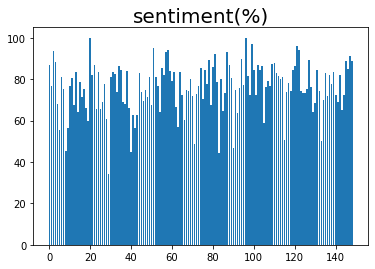

In [14]:
import numpy as np
import matplotlib.pyplot as plt

a=[]

for firm in sentiment_firm:
    a.append(firm[1]*100)

X=np.arange(len(a))

plt.title("sentiment(%)",fontsize=20)
plt.bar(X,a)
plt.show()

In [3]:
!pip install py_lex  # 세분화된 감성분석 위한 라이브러리 

ERROR: Invalid requirement: '#'


In [4]:
from py_lex import Liwc, EmoLex
import pandas as pd

# py_lex 감정어휘집 
emotion_dic=pd.read_excel('./dict/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations_ENG.xlsx')
emotion_dic[0:10]

,English (en),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0
5,abate,0,0,0,0,0,0,0,0,0,0
6,abatement,0,0,0,0,0,0,0,0,0,0
7,abba,1,0,0,0,0,0,0,0,0,0
8,abbot,0,0,0,0,0,0,0,0,0,1
9,abbreviate,0,0,0,0,0,0,0,0,0,0


In [18]:
# 영문으로 된 회장 인사말 감정분석 
df=emotion_dic.set_index('English (en)')

In [19]:
import matplotlib.pyplot as plt
import numpy as np

emotion_firm=[]

for token in tokens:
    firm=token[0]
    sentiment=0
    count=0
    
    arr=[]
    senti_count=0
    
    for t in token[1]:
        if t in df.index:
            count+=1
            arr.append(list(df.loc[t]))
            if np.sum(list(df.loc[t]))!=0:
                senti_count+=1
    emotion_firm.append([firm,np.sum(arr,axis=0),senti_count/count])

emotion_firm[0:10]

[['Amorepacific',
  array([218,  16,   6,  57,   4,  20,  97,   6,  14,  82]),
  0.4088050314465409],
 ['Asiana Airlines',
  array([147,  14,   9,  49,   5,  15,  41,   4,  17,  89]),
  0.41237113402061853],
 ['BNK Financial Group Inc.',
  array([96,  6,  2, 19,  2,  1, 20,  3,  2, 51]),
  0.43636363636363634],
 ['BPA', array([47,  6,  1, 12,  2,  2,  8,  2,  2, 24]), 0.34523809523809523],
 ['BS FINANCIAL GROUP INC',
  array([77,  6,  0, 19,  0,  3, 21,  3,  3, 40]),
  0.38],
 ['CJ', array([39,  9,  0,  6,  1,  4, 13,  3,  2, 25]), 0.4435483870967742],
 ['Coway',
  array([39,  1,  1, 17,  0,  1, 18,  1,  0, 23]),
  0.37606837606837606],
 ['Daelim',
  array([71, 14,  4, 12,  4, 13, 18,  8,  4, 29]),
  0.45918367346938777],
 ['Daewoo E&C',
  array([181,  46,   9,  50,  11,  14,  33,  15,  16,  96]),
  0.48727272727272725],
 ['Daum Communications',
  array([36,  7,  2, 24,  1,  3,  9,  1,  1, 15]),
  0.4645669291338583]]

In [20]:
# 각 기업마다 계산된 결과 >> 세분화된 감정으로 분류 및 저장 
emotion_result=[]

for firm in emotion_firm:
    emotion_result.append({"Firm" : firm[0],
                           "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Fear" : str("%0.2f"%( firm[1][5]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Joy" : str("%0.2f"%( firm[1][6]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sadness" : str("%0.2f"%( firm[1][7]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Surprise" : str("%0.2f"%( firm[1][8]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Trust" : str("%0.2f"%( firm[1][9]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sentiwords / non-sentiwords (%)":str("%0.2f"%(firm[2]*100))+"%"}
                          )
emotion_result[0:10]

[{'Firm': 'Amorepacific',
  'Positive': '93.16%',
  'Negative': '6.84%',
  'Anger': '2.56%',
  'Anticipation': '24.36%',
  'Disgust': '1.71%',
  'Fear': '8.55%',
  'Joy': '41.45%',
  'Sadness': '2.56%',
  'Surprise': '5.98%',
  'Trust': '35.04%',
  'Sentiwords / non-sentiwords (%)': '40.88%'},
 {'Firm': 'Asiana Airlines',
  'Positive': '91.30%',
  'Negative': '8.70%',
  'Anger': '5.59%',
  'Anticipation': '30.43%',
  'Disgust': '3.11%',
  'Fear': '9.32%',
  'Joy': '25.47%',
  'Sadness': '2.48%',
  'Surprise': '10.56%',
  'Trust': '55.28%',
  'Sentiwords / non-sentiwords (%)': '41.24%'},
 {'Firm': 'BNK Financial Group Inc.',
  'Positive': '94.12%',
  'Negative': '5.88%',
  'Anger': '1.96%',
  'Anticipation': '18.63%',
  'Disgust': '1.96%',
  'Fear': '0.98%',
  'Joy': '19.61%',
  'Sadness': '2.94%',
  'Surprise': '1.96%',
  'Trust': '50.00%',
  'Sentiwords / non-sentiwords (%)': '43.64%'},
 {'Firm': 'BPA',
  'Positive': '88.68%',
  'Negative': '11.32%',
  'Anger': '1.89%',
  'Anticipatio

In [21]:
# 3차원 시각화(세분화한 감정분석 결과 시각화 >> x, y, z)

y=[]

for firm in emotion_firm:
    y.append(list(firm[1][2:]))

x=['Positive','Negative','Anger','Anticipation','Disgust','Fear','Joy','Sadness','Suprise','Trust']

z=[]
for firm in emotion_firm:
    z.append(firm[0])

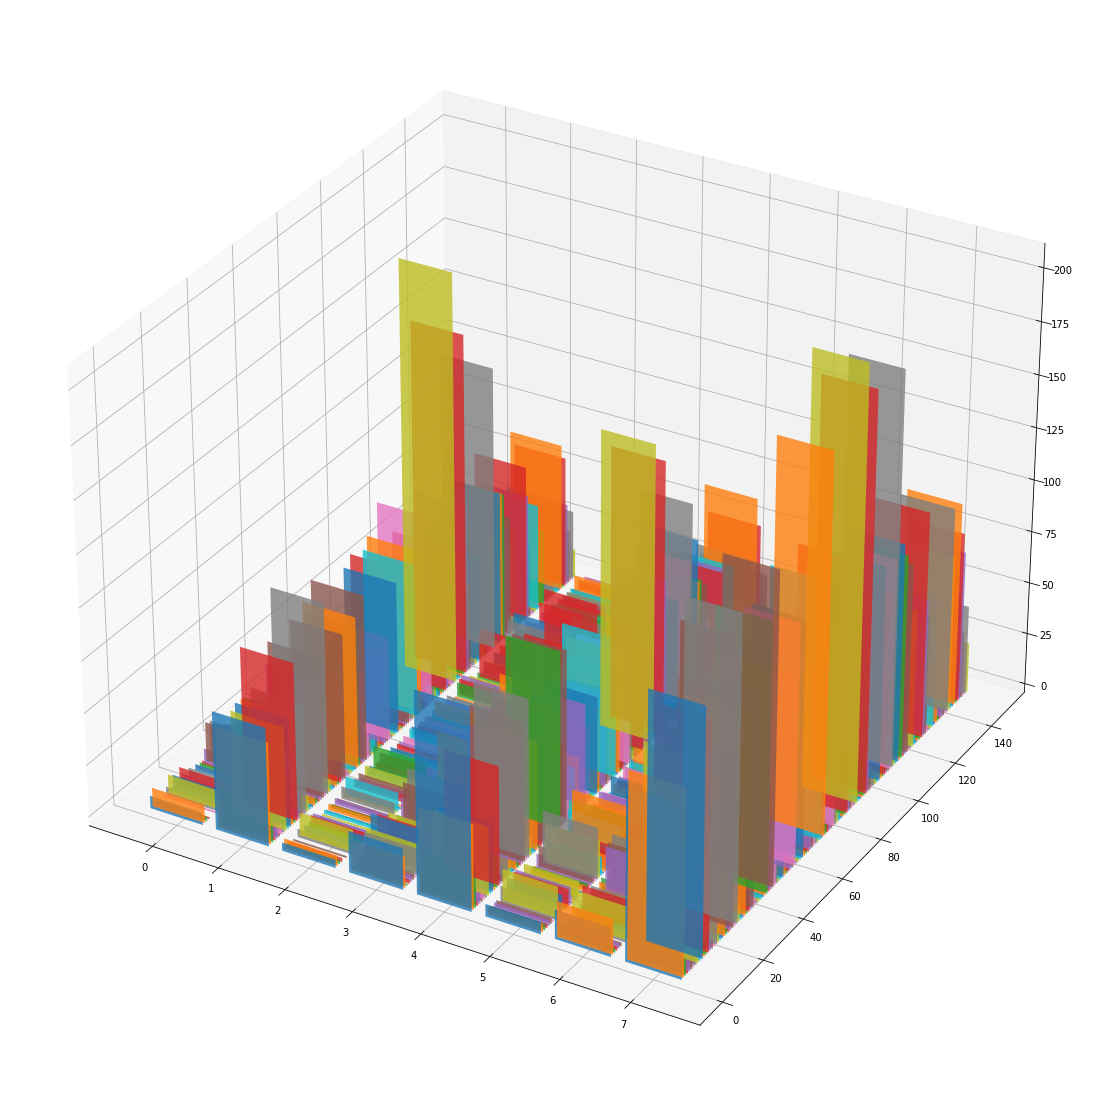

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
fig.set_size_inches(20, 20, 20)

ax = fig.add_subplot(111,projection='3d')

for firm in emotion_firm:
    xs=np.arange(8)

    ys=firm[1][2:]
    zs=emotion_firm.index(firm)
    ax.bar(xs,ys,zs,zdir='y',alpha=0.8)

plt.show()

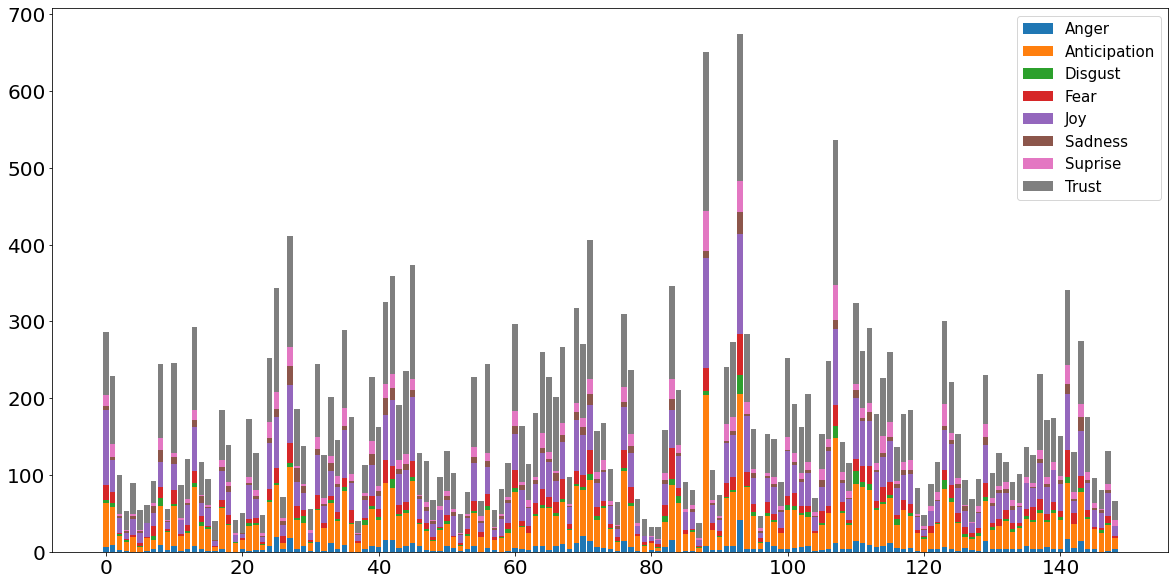

In [23]:
# 2차원 시각화 (세분화한 감정분석 결과 시각화, x: 기업, y: 감정)

E=[]

plt.rcParams["figure.figsize"]=(20,10)
plt.rcParams["ytick.labelsize"]=20
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["legend.fontsize"]=15

for firm in emotion_firm:
    E.append(firm[1][2:])

a=np.transpose(E)

X=np.arange(len(a[0])) 

plt.bar(X,a[0],label='Anger')
plt.bar(X,a[1],bottom=a[0],label='Anticipation')
plt.bar(X,a[2],bottom=sum(a[0:2]),label='Disgust')
plt.bar(X,a[3],bottom=sum(a[0:3]),label='Fear')
plt.bar(X,a[4],bottom=sum(a[0:4]),label='Joy')
plt.bar(X,a[5],bottom=sum(a[0:5]),label='Sadness')
plt.bar(X,a[6],bottom=sum(a[0:6]),label='Suprise')
plt.bar(X,a[7],bottom=sum(a[0:7]),label='Trust')

plt.xlabel="Firm index"
plt.legend()
plt.show()